[matplotlib-scalebar](https://github.com/ppinard/matplotlib-scalebar)是一个Python库，用于在matplotlib图形中添加比例尺。它允许用户指定比例尺的大小、位置、字体和颜色，以及比例尺的单位。该库支持不同的比例尺单位，例如米、英尺、英寸等。matplotlib-scalebar安装命令如下：

> pip install matplotlib-scalebar


比例尺是一种用于描述图上线段长度与实际相应线段长度之间关系的方法。其基本公式为：比例尺 = 图上距离 / 实际距离。比例尺的表示方法可以分为三种：

1. 数字式，采用数字的比例形式或分数形式来表示比例尺的大小。例如：1:10000或1/10000。
2. 线段式，在图上绘制一条线段，并注明图上该线段所代表的实际距离。
3. 文字式，用文字描述图上的距离与实际距离之间的比例关系。例如：图上每1厘米代表实际距离 100 米。

**matplotlib-scalebar仅适用于线段式比例尺的绘制**。因为在matplotlib中，我们可以通过文字绘制函数直接在图上添加数字式或文字式的比例尺。

In [18]:
# jupyter notebook环境去除warning
import warnings
warnings.filterwarnings("ignore")
import matplotlib_scalebar
# 打印matplotlib_scalebar版本
print("matplotlib_scalebar version",matplotlib_scalebar.__version__)

import matplotlib as plt
print("matplotlob version",plt.__version__)

matplotlib_scalebar version 0.8.1
matplotlob version 3.5.3


# 1 使用说明

## 1.1 快速入门

以下代码展示了一个matplotlib-scalebar的使用示例，matplotlib-scalebar提供ScaleBar类来创建预设比例尺：

```
ScaleBar(dx= 0.08, units= "cm", length_fraction=0.5)
```

其中dx，units和length_fraction都是基本参数，dx表示图中每个横向像素坐标实际代表0.08cm的长度，units表示使用cm厘米作为基准单位，length_fraction=0.5表示预设比例尺长度占实际绘图区域横向总长度的比例为50%。

**预设比例尺的含义为：matplotlib_scalebar.scalebar会根据我们预置的比例尺参数图，挑选合适规格的标准比例尺来表示**。如下所示：

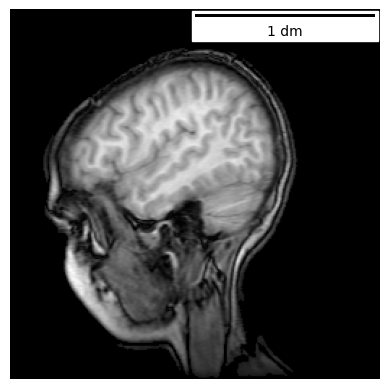

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar

# 载入自带图片数据，并将图片宽高都修改为256
with cbook.get_sample_data("s1045.ima.gz") as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

fig, ax = plt.subplots()
ax.axis("off")

# 绘图
ax.imshow(im, cmap="gray")

# 创建一个比例尺对象
scalebar = ScaleBar(dx= 0.08, units= "cm", length_fraction=0.5)
# 添加比例尺
ax.add_artist(scalebar)

plt.show()

如上图所示，比例尺由一根横线和横线下的文字标识组成。该比例尺表示图中横向方向上，横线的长度等于实际1dm(分米)。以文中matplotlib-scalebar绘图代码为例说明计算该比例尺的步骤：

1. 输入参数：图像横向像素个数为256，每个像素表示0.08cm，预设比例尺占横向方向总像素的length_fraction=0.5。那么预设比例尺的长度为`256*0.08*0.5`，也就是10.24cm，共占横向128个像素。
2. 判断10.24cm是否能进位换算为预设高一级的长度单位，例如10.24cm可换算为1.024dm。
3. 判断1.024达到预设的哪种比例尺数值规格，如1、2、5、10、15等。根据给定值，找出第一个大于等于给定值的规格数值。例如1.024应以比例尺规格值1表示，4.99应以比例尺规格值2表示。
4. 根据上一步结果，当前比例规格为1dm，那么比例尺的绘图长度将从预设长度改为1dm对应的长度。绘图长度的计算方式为`256*0.5*1/1.024`,也就是125个像素。
5. 在图中绘制长度为125个像素，标识为1dm的比例尺。


在matplotlib-scalebar，对于米制单位，预设比例尺数值规格为：

```python
[1, 2, 5, 10, 15, 20, 25, 50, 75, 100, 125, 150, 200, 500, 750]
```

预设比例尺单位规格为：

```python
{'m': 1.0,
 'Ym': 1e+24,
 'Zm': 1e+21,
 'Em': 1e+18,
 'Pm': 1000000000000000.0,
 'Tm': 1000000000000.0,
 'Gm': 1000000000.0,
 'Mm': 1000000.0,
 'km': 1000.0,
 'dm': 0.1,
 'cm': 0.01,
 'mm': 0.001,
 'µm': 1e-06,
 'um': 1e-06,
 'nm': 1e-09,
 'pm': 1e-12,
 'fm': 1e-15,
 'am': 1e-18,
 'zm': 1e-21,
 'ym': 1e-24}
 ```
 
matplotlib-scalebar关于比例尺的计算详细函数见[matplotlib_scalebar/dimension.py](https://github.com/ppinard/matplotlib-scalebar/blob/2c57173d67a346b323a4afff7b7dd9c7f1314da4/matplotlib_scalebar/scalebar.py#L384)的draw函数。

按照以上比例尺的计算步骤，如果dx= 0.01, units= "m", length_fraction=1。那么实际应该使用预设数值规格为2，单位规格为m，占横向200个像素的比例尺。如下所示：

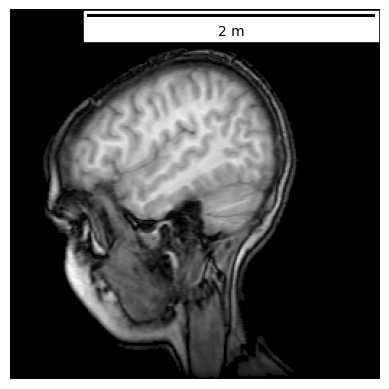

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar

# 载入matplotlib自带图片数据，并将图片宽高都修改为256
with cbook.get_sample_data("s1045.ima.gz") as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

fig, ax = plt.subplots()
ax.axis("off")

# 绘图
ax.imshow(im, cmap="gray")

# 创建一个比例尺对象
scalebar = ScaleBar(dx= 0.01, units= "m", length_fraction=1)
# 添加比例尺
ax.add_artist(scalebar)

plt.show()

在前面展示的是表示横向方向长度的比例尺，如果想创建表示纵向方向的比例尺，则在初始ScaleBar类时设置rotation="vertical"即可。要注意纵向比例尺是根据图像高度来计算的，如下代码所示：

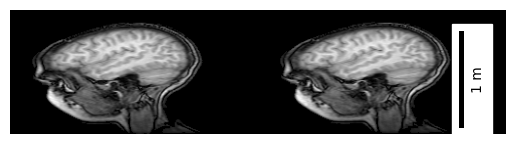

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar

# 载入自带图片数据，并将图片宽改为512，高改为128，可以对比不设置rotation="vertical"时的效果
with cbook.get_sample_data("s1045.ima.gz") as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((128, 512))

fig, ax = plt.subplots()
ax.axis("off")

# 绘图
ax.imshow(im, cmap="gray")

# 创建一个比例尺对象
scalebar = ScaleBar(dx=0.01,
                    units="m",
                    length_fraction=1,
                    rotation="vertical",
                    scale_loc="right",
                    border_pad=1,
                    pad=0.5)
# 添加比例尺
ax.add_artist(scalebar)

plt.show()


## 1.2 ScaleBar类说明

ScaleBar类构造函数的参数如下所示：

```
dx (float): x轴的长度，以当前绘图单位表示。  
units (str, optional): 标尺的单位。默认为"m"。  
dimension (str, optional): 标尺的属性维度。默认为"si-length"。  
label (str or None, optional): 标尺的标签文字。默认为None。  
length_fraction (float, optional): 标尺的长度与总长度的比例。默认为None。  
height_fraction (float, optional): 标尺的高度与总高度的比例。默认为None，该参数已经废除，使用width_fraction替代。  
width_fraction (float, optional): 标尺的宽度与总宽度的比例。默认为None。  
location (tuple or None, optional): 标尺的位置。默认为None。  
pad (tuple or None, optional): 内边距。默认为None。  
border_pad (tuple or None, optional): 外边距。默认为None。  
sep (tuple or None, optional): 标签文字与标尺之间的间隔。默认为None。  
frameon (bool or None, optional): 是否显示标尺背景框。默认为None。  
color (str or tuple or None, optional): 标尺的颜色。默认为None。  
box_color (str or tuple or None, optional): 标尺线框的颜色。默认为None。  
box_alpha (float or None, optional): 标尺线框的透明度。默认为None。  
scale_loc (str or None, optional): 标尺放置的位置。默认为None。  
label_loc (str or None, optional): 标签文字放置的位置。默认为None。  
font_properties (str or None, optional): 字体样式。默认为None。  
label_formatter (str or None, optional): 标签文字格式化函数。默认为None，该参数已经废除，使用scale_formatter替代。  
scale_formatter (str or None, optional): 标尺刻度格式化函数。默认为None。  
fixed_value (float or None, optional): 固定的标尺值。默认为None。  
fixed_units (str or None, optional): 固定的标尺单位。默认为None。  
animated (bool, optional): 是否以动画的形式进行显示。默认为False。  
rotation (float or None, optional): 标签文字的旋转角度。默认为None。  
bbox_to_anchor (str or tuple or None, optional): 标签文字的位置基准。默认为None，一些matplotlib_scalebar版本可能不支持该参数。  
bbox_transform (str or None, optional): 标签文字的变换函数。默认为None，一些matplotlib_scalebar版本可能不支持该参数。 
```

ScaleBar一些主要参数决定了比例尺的展示效果，下图展示了ScaleBar主要参数的作用域：

![](image/img1.png)

值得注意的是，ScaleBar提供了两种计算比例尺规格的方式：

1. 第一种是1.1节提到的计算方式，根据dx、units、length_fraction值创建预置比例尺参数，然后根据这些参数自动确定比例尺的绘制规格标准。推荐使用该方式创建比例尺。
2. 第二种是直接通过fixed_value和fixed_units确定比例尺的绘制规格标准，然后结合dx参数完成比例尺的绘制，这种情况主要适用于需要设置特定数值。

接下来，对ScaleBar的主要参数进行介绍。

### 1.2.1 dx, units, dimension

dx为必须输入参数，表示一个像素点代表的实际大小。units表示单位，dimension表示单位属性（所属单位制），可选的长度单位参数如下表所示：

|dimension|units|
|-|-|
|si-length|km, m, cm, um|
|imperial-length|in, ft, yd, mi|
|si-length-reciprocal|1/m, 1/cm|
|angle|deg|

如果使用GeoPandas绘制地图的比例尺则需要根据坐标系的类型来确定dx，具体如何在GeoPandas中确定dx见：[Python绘制数据地图3-GeoPandas使用要点](https://www.cnblogs.com/luohenyueji/p/17485432.html)。

将比例尺的标识改为imperial-length英制长度的示例代码如下：

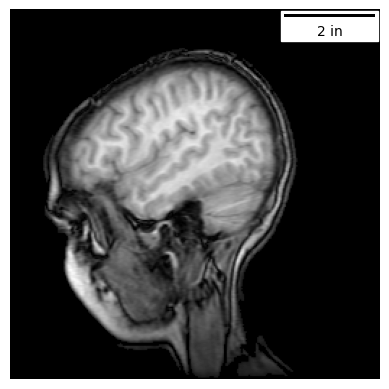

In [22]:

# 载入matplotlib自带图片数据，并将图片宽高都修改为256
with cbook.get_sample_data("s1045.ima.gz") as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

fig, ax = plt.subplots()
ax.axis("off")

ax.imshow(im, cmap="gray")

scalebar = ScaleBar(dx=0.0315, units="in", dimension="imperial-length", length_fraction=0.25)
ax.add_artist(scalebar)

### 1.2.2 label, label_loc, scale_loc

label设置标尺的标签文字。label_loc设置标签文字相对于比例尺的位置，可选值有： bottom, top, left, right, none（不显示标签文字）。 scale_loc设置比例尺标注值相对于比例尺的位置，可选值有： bottom, top, left, right, none（不显示标注文字）。示例代码如下：

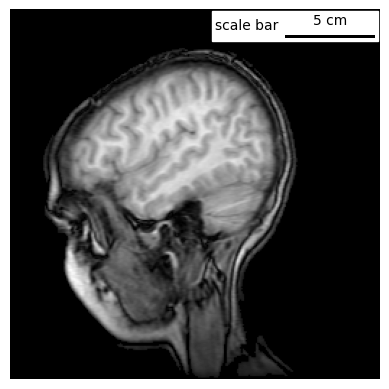

In [23]:

# 载入matplotlib自带图片数据，并将图片宽高都修改为256
with cbook.get_sample_data("s1045.ima.gz") as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

fig, ax = plt.subplots()
ax.axis("off")

ax.imshow(im, cmap="gray")

scalebar = ScaleBar(dx= 0.08, units= "cm", length_fraction=0.25, 
                    label="scale bar",label_loc="left", scale_loc="top")
ax.add_artist(scalebar)

### 1.2.3 length_fraction, width_fraction

length_fraction设置比例尺相对于图形的长度，如果不指定值，在代码内部会以为0.2（20%)赋值。width_fraction设置比例尺相对于图形的宽度，如果不指定值，在代码内部会以为0.01（1%)赋值。本文在1.1节提到过，在这种情况下比例尺标注值只能取以下数字确定的：1、2、5、10、15等。如果需要特定的值，需要指定fixed_value和fixed_units。示例代码如下:

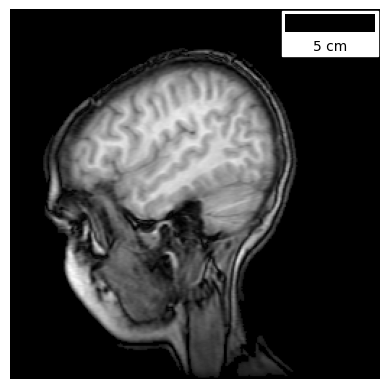

In [24]:
# 载入自带图片数据，并将图片宽高都修改为256
with cbook.get_sample_data("s1045.ima.gz") as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

fig, ax = plt.subplots()
ax.axis("off")

# 绘图
ax.imshow(im, cmap="gray")

# 创建一个比例尺对象
scalebar = ScaleBar(dx= 0.08, units= "cm", length_fraction=0.25, width_fraction=0.05)
# 添加比例尺
ax.add_artist(scalebar)

plt.show()

### 1.2.4 标尺位置与边距

+ location：设置图例的位置，该参数作用与matplotlib的图例位置设置参数相同，取值可以是：upper right, upper left, lower left, lower right, right, center left, center right, lower center, upper center或center。默认值为None，表示使用matplotlib的默认值。
+ loc：location的别名。
+ pad：内边距，默认为None，表示使用matplotlib的默认值0.2。
+ border_pad：外边距，默认为None，表示使用matplotlib的默认值0.1。
+ sep：标签文字与标尺之间的间隔，默认为None，表示使用matplotlib的默认值5。
+ frameon：是否显示标尺背景框，默认为None，表示使用matplotlib的默认值True，该背景框默认为白色背景。

示例代码如下:

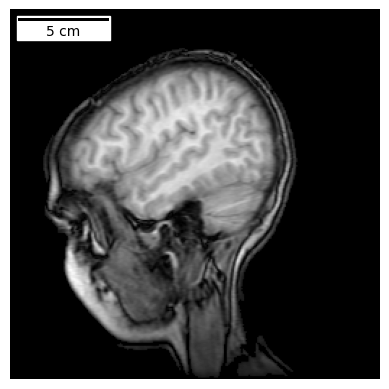

In [25]:
# 载入自带图片数据，并将图片宽高都修改为256
with cbook.get_sample_data("s1045.ima.gz") as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

fig, ax = plt.subplots()
ax.axis("off")

# 绘图
ax.imshow(im, cmap="gray")

# 创建一个比例尺对象
# 如果将frameon设置为False，对于当前背景为黑色的图片需要修改标尺颜色以更好可视化效果。
scalebar = ScaleBar(dx= 0.08, units= "cm", length_fraction=0.25, 
                    location="upper left", pad = 0.1, border_pad=0.5, 
                    sep=2, frameon=True)
# 添加比例尺
ax.add_artist(scalebar)

plt.show()

### 1.2.5 颜色

matplotlib-scalebar通过color参数设置标尺及标注文字的颜色，通过box_color和box_alpha设置背景框的颜色和透明度。示例代码如下：

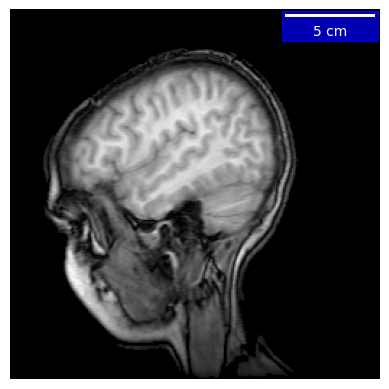

In [26]:
# 载入自带图片数据，并将图片宽高都修改为256
with cbook.get_sample_data("s1045.ima.gz") as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

fig, ax = plt.subplots()
ax.axis("off")

# 绘图
ax.imshow(im, cmap="gray")

# 创建一个比例尺对象
scalebar = ScaleBar(dx= 0.08, units= "cm", length_fraction=0.25, 
                    color="white", box_color = "blue", box_alpha=0.7)
# 添加比例尺
ax.add_artist(scalebar)

plt.show()

### 1.2.6 font_properties和scale_formatter
font_properties设置标签文本的字体属性，具体使用见matplotlib的[FontProperties](https://matplotlib.org/api/font_manager_api.html#matplotlib.font_manager.FontProperties)。
scale_formatter调用类似`lambda value, unit: f"{value} {unit}"`这类自定义函数来自定义比例尺的标注值，默认为none。

示例代码如下：


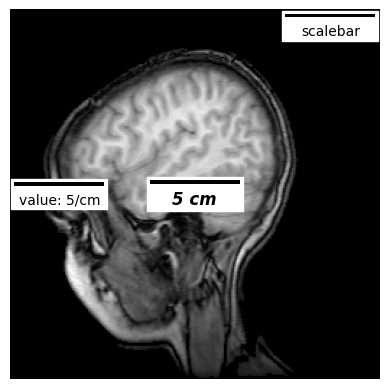

In [27]:
# 载入自带图片数据，并将图片宽高都修改为256
with cbook.get_sample_data("s1045.ima.gz") as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

fig, ax = plt.subplots()
ax.axis("off")

# 绘图
ax.imshow(im, cmap="gray")

# 创建一个比例尺对象
scalebar1 = ScaleBar(dx= 0.08, units= "cm", length_fraction=0.25, 
                   scale_formatter = lambda value, unit: f"scalebar")

scalebar2 = ScaleBar(dx= 0.08, units= "cm", length_fraction=0.25, location='center left',
                   scale_formatter = lambda value, unit: f"value: {value}/{unit}")
scalebar3 = ScaleBar(dx= 0.08, units= "cm", length_fraction=0.25, location='center',
                   font_properties={'style':'italic','weight':'bold','size':12})
    
# 添加比例尺
ax.add_artist(scalebar1)
ax.add_artist(scalebar2)
ax.add_artist(scalebar3)

plt.show()

### 1.2.7 fixed_value, fixed_units

fixed_value和fixed_units用于自定义比例尺标注值，当fixed_value默认为none表示根据dx自动确定比例尺的标注值。比例尺的长度会根据dx和这两个参数而自动调整。示例代码如下：

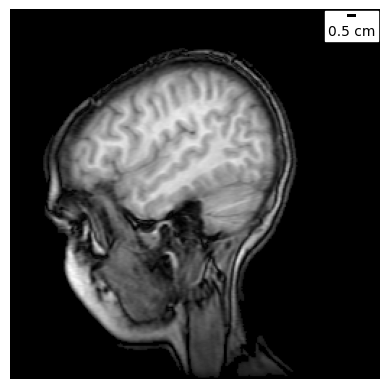

In [28]:
# 载入自带图片数据，并将图片宽高都修改为256
with cbook.get_sample_data("s1045.ima.gz") as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

fig, ax = plt.subplots()
ax.axis("off")

# 绘图
ax.imshow(im, cmap="gray")

# 创建一个比例尺对象
scalebar = ScaleBar(dx= 0.08, units= "cm", length_fraction=0.25, 
                    fixed_value=0.5, fixed_units= "cm")
# 添加比例尺
ax.add_artist(scalebar)

plt.show()

### 1.2.8 rotation

rotation表示是基于x轴还是基于y轴创建比例尺。rotation可取horizontal或vertical。如果调整rotation，可能需要调整scale_loc和label_loc以实现合理的比例尺布局。如果改变rotation的值后，比例尺标注值显示有问题，可以尝试升级matplotlib版本解决。rotation默认为None，表示使用matplotlib的默认值。如下：

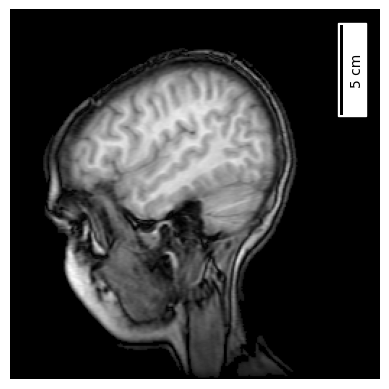

In [29]:
# 载入自带图片数据，并将图片宽高都修改为256
with cbook.get_sample_data("s1045.ima.gz") as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))
fig, ax = plt.subplots()
ax.axis("off")

ax.imshow(im, cmap="gray")

scalebar = ScaleBar(
    0.08,
    "cm",
    length_fraction=0.25,
    rotation="vertical",
    scale_loc="right",
    border_pad=1,
    pad=0.1,
)
ax.add_artist(scalebar)

# 2 绘图实例

[plywood-gallery-matplotlib-scalebar](https://kolibril13.github.io/plywood-gallery-matplotlib-scalebar/)提供了一个交互式matplotlib-scalebar的绘图实例，每个实例给出了不同图例参数详细的绘制代码，非常推荐学习和使用。绘图实例内容如下：

![](image/img2.png)

总体绘图效果如下：

![](image/img3.png)



以下代码展示不同绘图实例的效果。

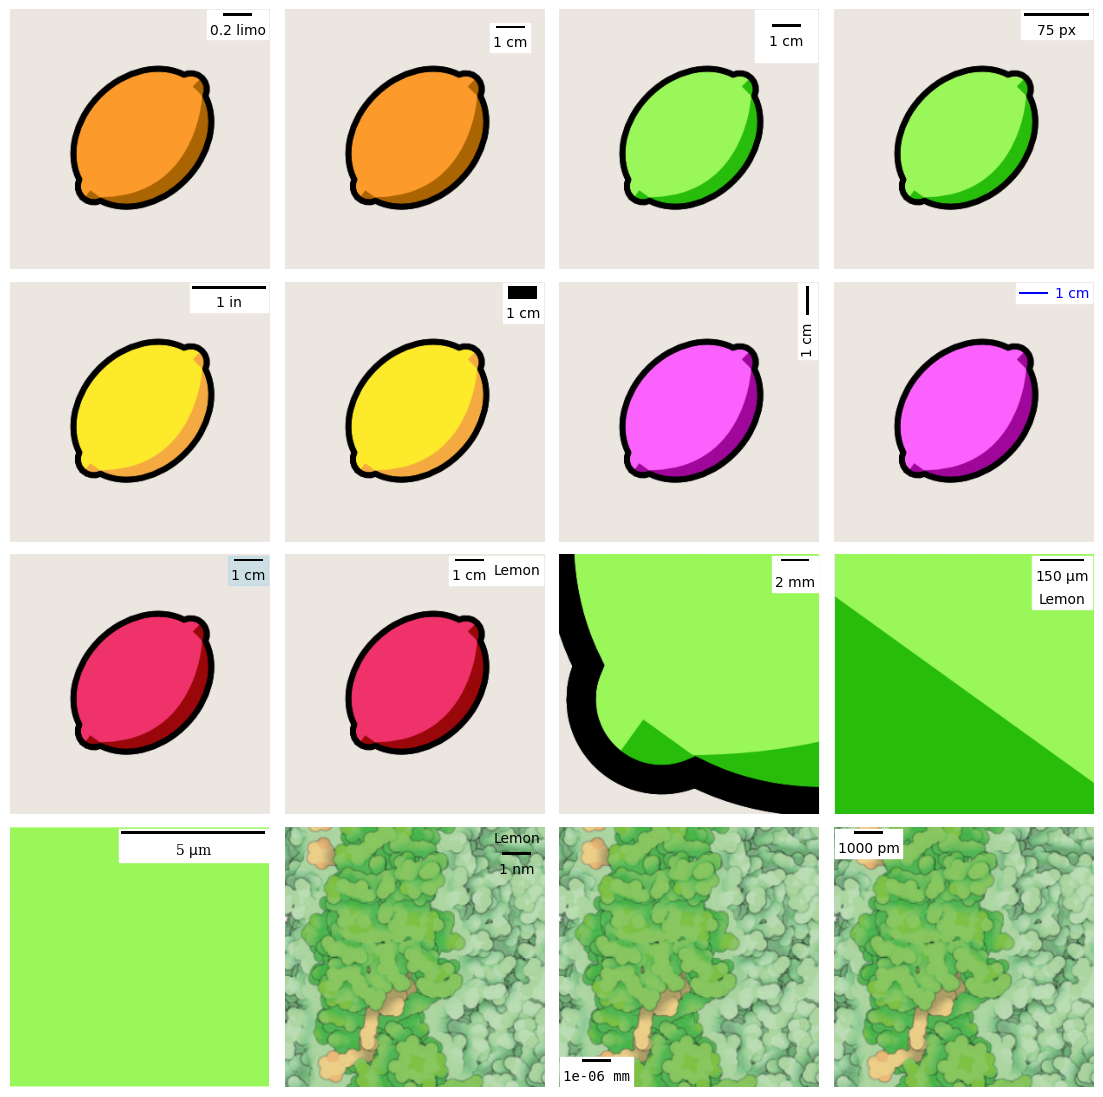

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.image as mpimg

# 添加比例尺代码
def imshow_bar(im, scalebar,ax):
    ax.axis("off")
    ax.imshow(im)
    ax.add_artist(scalebar)

fig, _ = plt.subplots(figsize=(14, 14))
# 调整子图间距
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# 图1
ax = plt.subplot(441)
img = mpimg.imread("image/orange.png")
scalebar = ScaleBar(0.3, "mm", scale_formatter=lambda value, unit: f"{value/5} limo")
imshow_bar(img, scalebar,ax=ax)

# 图2
ax = plt.subplot(442)
img = mpimg.imread("image/orange.png")
scalebar = ScaleBar(0.3, "mm", border_pad=1)
imshow_bar(img, scalebar,ax=ax)

# 图3
ax = plt.subplot(443)
img = mpimg.imread("image/green.png")
scalebar = ScaleBar(0.3, "mm", pad=1)
imshow_bar(img, scalebar,ax=ax)

# 图4
ax = plt.subplot(444)
img = mpimg.imread("image/green.png")
scalebar = ScaleBar(1, "px", dimension="pixel-length", length_fraction=0.3)
imshow_bar(img, scalebar,ax=ax)

# 图5
ax = plt.subplot(445)
img = mpimg.imread("image/yellow.png")
scalebar = ScaleBar(0.03 / 2.54, "in", dimension="imperial-length", length_fraction=0.3)
imshow_bar(img, scalebar,ax=ax)

# 图6
ax = plt.subplot(4,4,6)
img = mpimg.imread("image/yellow.png")
scalebar = ScaleBar(0.3, "mm", height_fraction=0.05)
imshow_bar(img, scalebar,ax=ax)

# 图7
ax = plt.subplot(4,4,7)
img = mpimg.imread("image/purple.png")
scalebar = ScaleBar(0.3, "mm", rotation="vertical")
imshow_bar(img, scalebar,ax=ax)

# 图8
ax = plt.subplot(4,4,8)
img = mpimg.imread("image/purple.png")
scalebar = ScaleBar(0.3, "mm", color="blue", scale_loc="right")
imshow_bar(img, scalebar,ax=ax)

# 图9
ax = plt.subplot(4,4,9)
img = mpimg.imread("image/red.png")
scalebar = ScaleBar(0.3, "mm", box_color="skyblue", box_alpha=0.3)
imshow_bar(img, scalebar,ax=ax)

# 图10
ax = plt.subplot(4,4,10)
img = mpimg.imread("image/red.png")
scalebar = ScaleBar(0.3, "mm", label="Lemon", label_loc="right")
imshow_bar(img, scalebar,ax=ax)

# 图11
ax = plt.subplot(4,4,11)
img = mpimg.imread("image/zoom1.png")
scalebar = ScaleBar(0.3 / 5, "mm", sep=10)
imshow_bar(img, scalebar,ax=ax)

# 图12
ax = plt.subplot(4,4,12)
img = mpimg.imread("image/zoom2.png")
scalebar = ScaleBar(0.3 / 100, "mm", label="Lemon", label_loc="bottom")
imshow_bar(img, scalebar,ax=ax)

# 图13
ax = plt.subplot(4,4,13)
img = mpimg.imread("image/zoom3.png")
scalebar = ScaleBar(0.3 / 10000, "mm", length_fraction=1, font_properties="serif")
imshow_bar(img, scalebar,ax=ax)

# 图14
ax = plt.subplot(4,4,14)
img = mpimg.imread("image/zoom4.png")
scalebar = ScaleBar(0.3 / 10000000, "mm", frameon=False, label="Lemon")
imshow_bar(img, scalebar,ax=ax)

# 图15
ax = plt.subplot(4,4,15)
img = mpimg.imread("image/zoom4.png")
scalebar = ScaleBar(0.3 / 10000000, "mm", fixed_units="mm", fixed_value=1e-6, font_properties="monospace", location="lower left")
imshow_bar(img, scalebar,ax=ax)

# 图16
ax = plt.subplot(4,4,16)
img = mpimg.imread("image/zoom4.png")
scalebar = ScaleBar(0.3 / 10000000, "mm", fixed_units="pm", fixed_value=1000, location="upper left")
imshow_bar(img, scalebar,ax=ax)

# 保存图片
plt.savefig("res.jpg",dpi=300)
plt.show()

# 3 参考

+ [matplotlib-scalebar](https://github.com/ppinard/matplotlib-scalebar)
+ [matplotlib_scalebar/dimension.py](https://github.com/ppinard/matplotlib-scalebar/blob/2c57173d67a346b323a4afff7b7dd9c7f1314da4/matplotlib_scalebar/scalebar.py#L384)
+ [Python绘制数据地图3-GeoPandas使用要点](https://www.cnblogs.com/luohenyueji/p/17485432.html)
+ [FontProperties](https://matplotlib.org/api/font_manager_api.html#matplotlib.font_manager.FontProperties)
+ [plywood-gallery-matplotlib-scalebar](https://kolibril13.github.io/plywood-gallery-matplotlib-scalebar/)